In [4]:
#importing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as st
import statsmodels.formula.api as sfa
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.api as sa
from sklearn.preprocessing import LabelEncoder
import plotly.express as pe
plt.rcParams['figure.figsize'] = (10,5)
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df = pd.read_csv('ToyotaCorolla.csv',encoding='unicode_escape')
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [7]:
#extracting important columns
df = df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [8]:
data = df.rename({'Age_08_04':'age','Quarterly_Tax':'QTax','Weight':'wei'},axis=1)

In [9]:
data.head(10)

,Price,age,KM,HP,cc,Doors,Gears,QTax,wei
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170
6,16900,27,94612,90,2000,3,5,210,1245
7,18600,30,75889,90,2000,3,5,210,1245
8,21500,27,19700,192,1800,3,5,100,1185
9,12950,23,71138,69,1900,3,5,185,1105


In [10]:
data[data.duplicated()]

,Price,age,KM,HP,cc,Doors,Gears,QTax,wei
113,24950,8,13253,116,2000,5,5,234,1320


In [11]:
data=data.drop_duplicates().reset_index(drop=True)
data

,Price,age,KM,HP,cc,Doors,Gears,QTax,wei
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [12]:
#checking descriptive stats
data.describe()

,Price,age,KM,HP,cc,Doors,Gears,QTax,wei
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [13]:
#Check for null value
data.isna().sum()

Price    0
age      0
KM       0
HP       0
cc       0
Doors    0
Gears    0
QTax     0
wei      0
dtype: int64

<h2 style="color:red; font-family: Arial;">Correlation Analysis</h2>

In [14]:
data.corr()

,Price,age,KM,HP,cc,Doors,Gears,QTax,wei
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QTax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
wei,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


<Axes: >

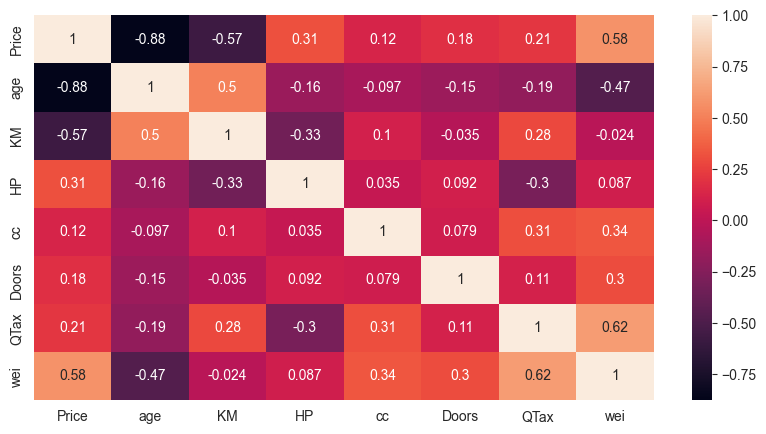

In [15]:
sns.heatmap(data[["Price","age","KM","HP","cc","Doors","QTax","wei"]].corr(),annot=True)

<span style="color:blue; font-family: Arial;">Correlation with target</span>

<Axes: >

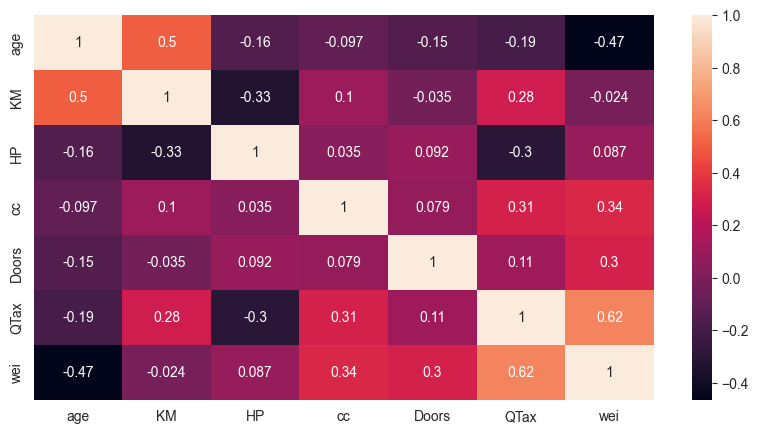

In [16]:
sns.heatmap(data[["age","KM","HP","cc","Doors","QTax","wei"]].corr(),annot=True)

<span style="color:blue; font-family: Arial;">Correlation without target</span>

<h2 style="color:red; font-family: Arial;">Model building</h2>

In [17]:
model = sfa.ols('Price~age+KM+HP+cc+Doors+Gears+QTax+wei', data=data).fit()

In [18]:
model.rsquared

0.8625200256947

<span style="color:blue; font-family: Arial;">model accuracy: 87%</span>

In [19]:
#Finding Coefficient parameters
model.params

Intercept   -5472.540368
age          -121.713891
KM             -0.020737
HP             31.584612
cc             -0.118558
Doors          -0.920189
Gears         597.715894
QTax            3.858805
wei            16.855470
dtype: float64

In [20]:
# Finding  and pvalues
model.tvalues , np.round(model.pvalues,5)

(Intercept    -3.875273
 age         -46.551876
 KM          -16.552424
 HP           11.209719
 cc           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QTax          2.944198
 wei          15.760663
 dtype: float64,
 Intercept    0.00011
 age          0.00000
 KM           0.00000
 HP           0.00000
 cc           0.18824
 Doors        0.98164
 Gears        0.00245
 QTax         0.00329
 wei          0.00000
 dtype: float64)

<span style="color:blue; font-family: Arial;">conclusion :</span>

* insignificance in variable 'cc' & 'Doors'

In [21]:
# Build MLR model for insignificant variables 'CC' and 'Doors'
# Also find their  pvalue

In [22]:
mlr_cd=sfa.ols('Price~cc+Doors',data=data).fit()
mlr_cd.pvalues 

Intercept    1.580945e-35
cc           2.101878e-05
Doors        2.109558e-11
dtype: float64

<span style="color:blue; font-family: Arial;">CC & Doors have significant pvalue</span>

# Model Validation 

<h2 style="color:red; font-family: Arial;">Collinearity Check</h2>

In [23]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_age=sfa.ols('age~KM+HP+cc+Doors+Gears+ QTax+wei',data=data).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=sfa.ols('KM~age+HP+cc+Doors+Gears+ QTax+wei',data=data).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=sfa.ols('HP~age+KM+cc+Doors+Gears+ QTax+wei',data=data).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=sfa.ols('cc~age+KM+HP+Doors+Gears+ QTax+wei',data=data).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=sfa.ols('Doors~age+KM+HP+cc+Gears+ QTax+wei',data=data).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=sfa.ols('Gears~age+KM+HP+cc+Doors+ QTax+wei',data=data).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=sfa.ols(' QTax~age+KM+HP+cc+Doors+Gears+wei',data=data).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=sfa.ols('wei~age+KM+HP+cc+Doors+Gears+ QTax',data=data).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['age','KM','HP','cc','Doors','Gears',' QTax','wei'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QTax,2.295375
7,wei,2.487180


<span style="color:blue; font-family: Arial;">None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation</span>

<h2 style="color:red; font-family: Arial;">Residual Analysis</h2>

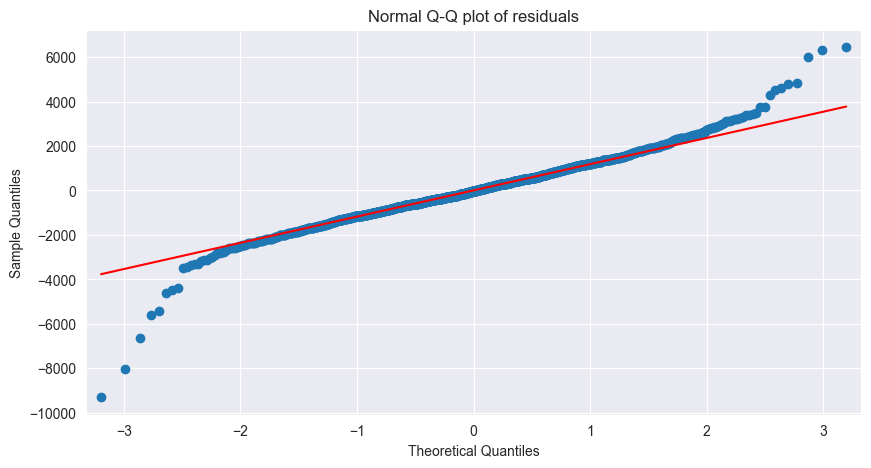

In [24]:

# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sa.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [25]:
list(np.where(model.resid>6000))  # outliar detected from above QQ plot of residuals


[array([109, 146, 522], dtype=int64)]

In [26]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

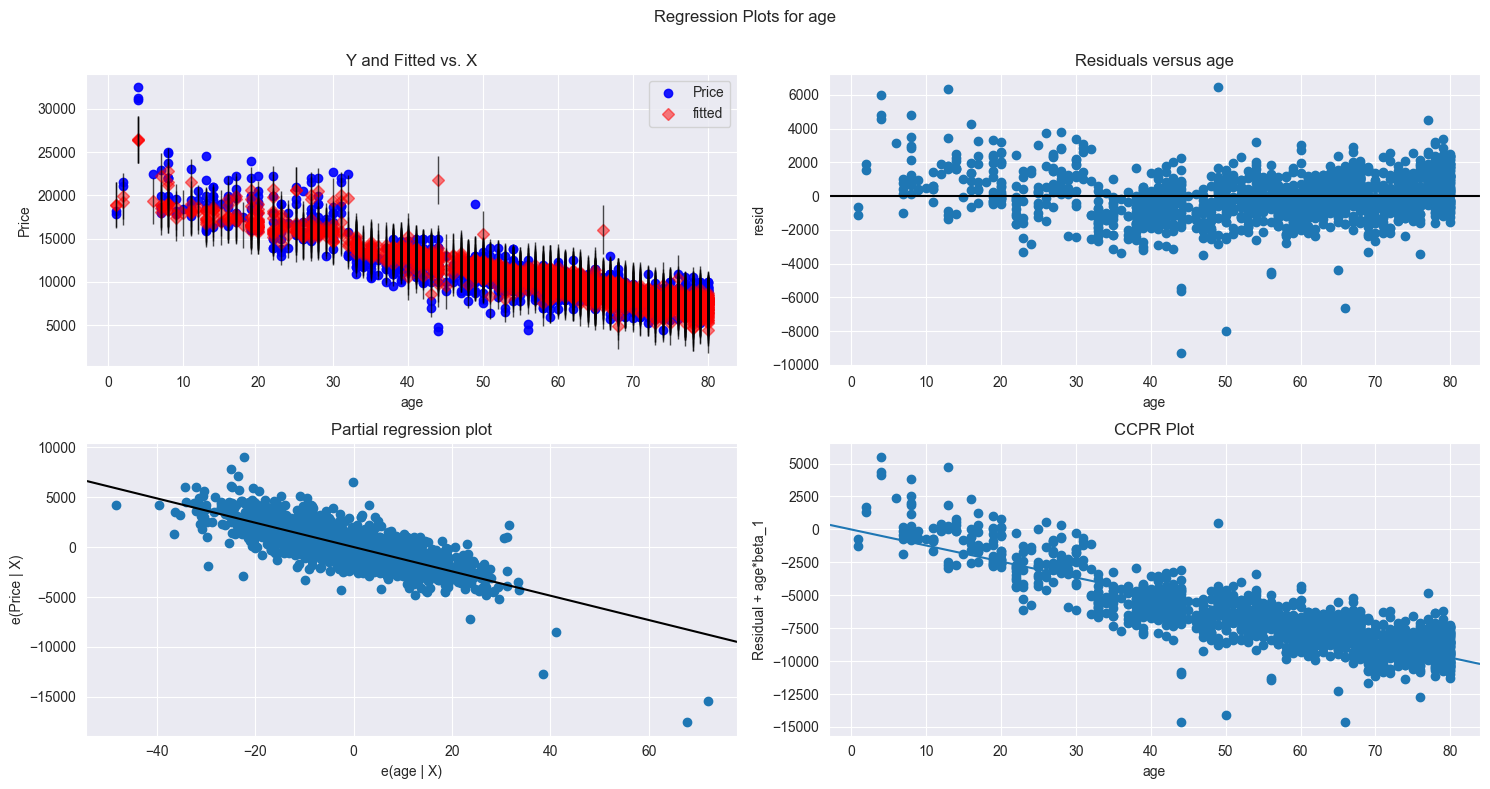

In [27]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
fig=plt.figure(figsize=(15,8))
sa.graphics.plot_regress_exog(model,'age',fig=fig)
plt.show()

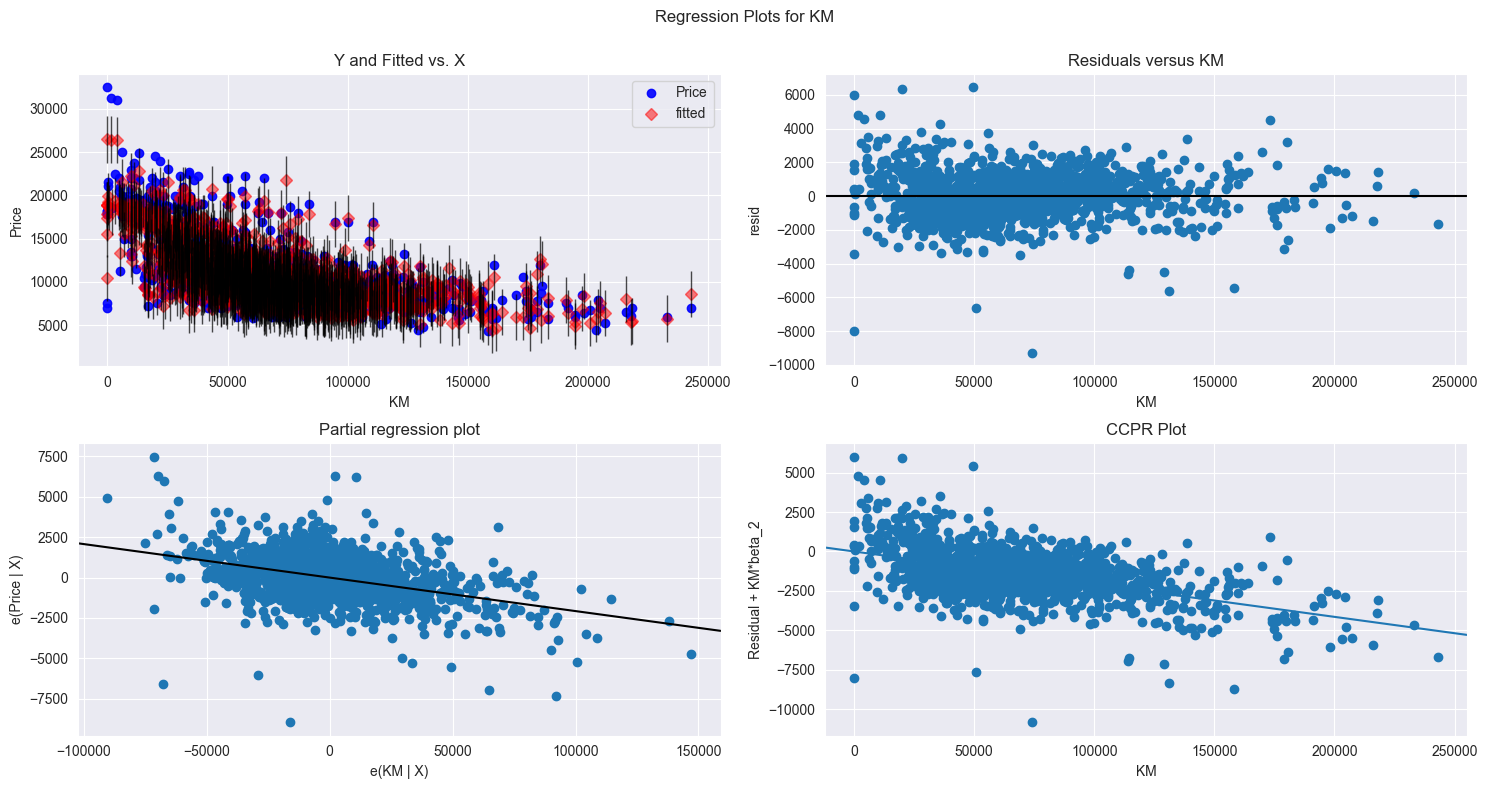

In [28]:
fig=plt.figure(figsize=(15,8))
sa.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

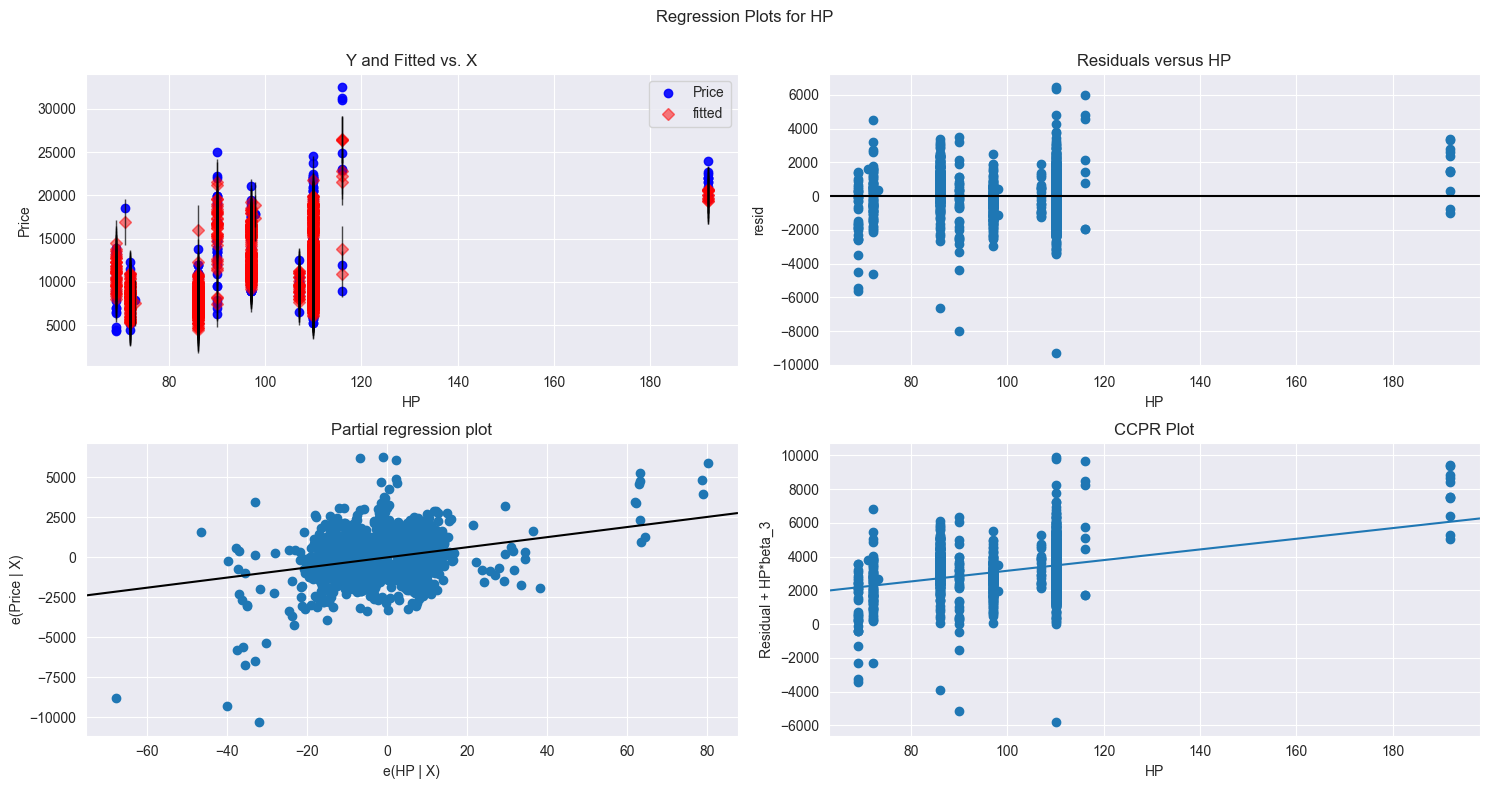

In [29]:
fig=plt.figure(figsize=(15,8))
sa.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

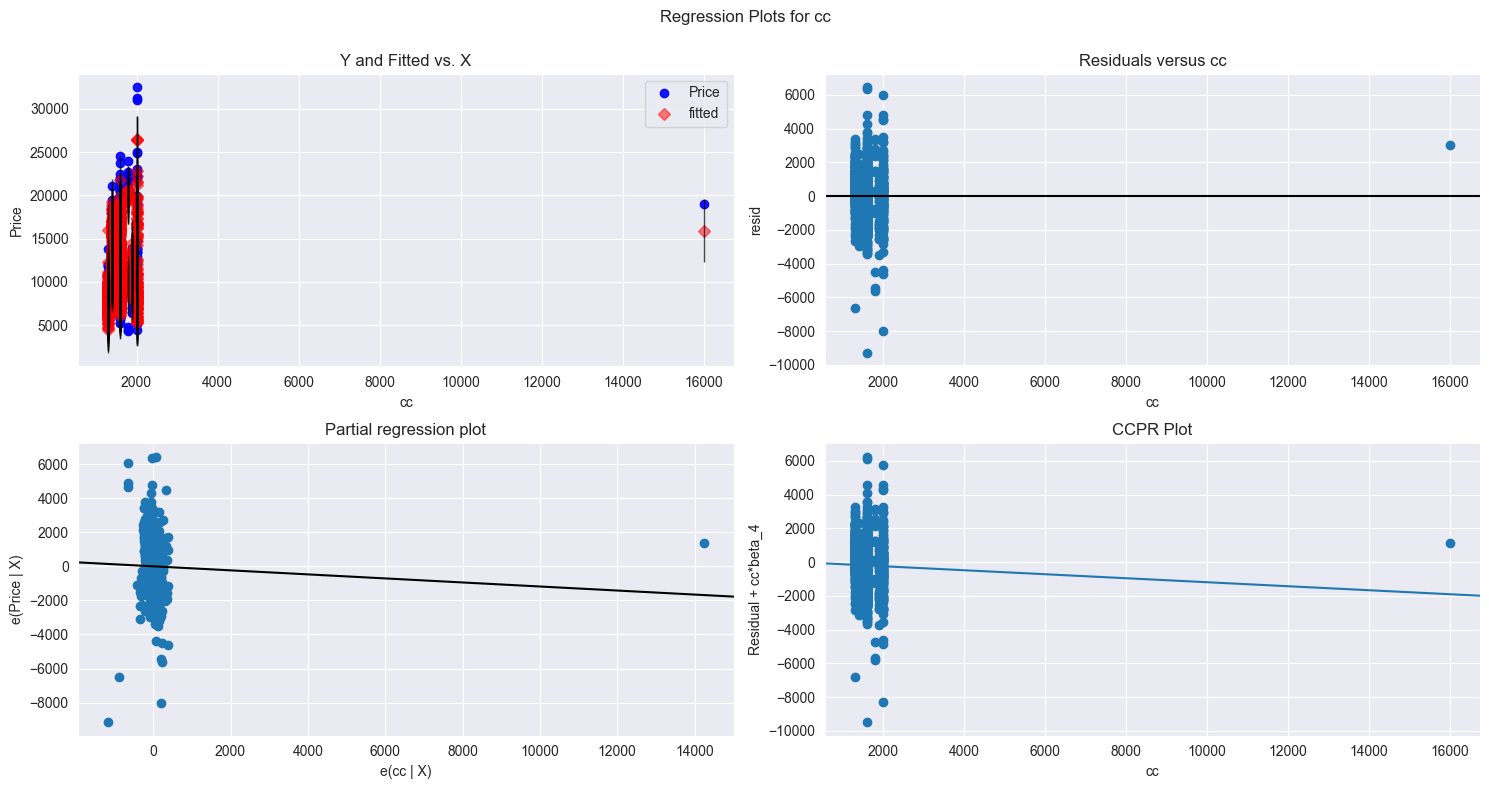

In [30]:
fig=plt.figure(figsize=(15,8))
sa.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

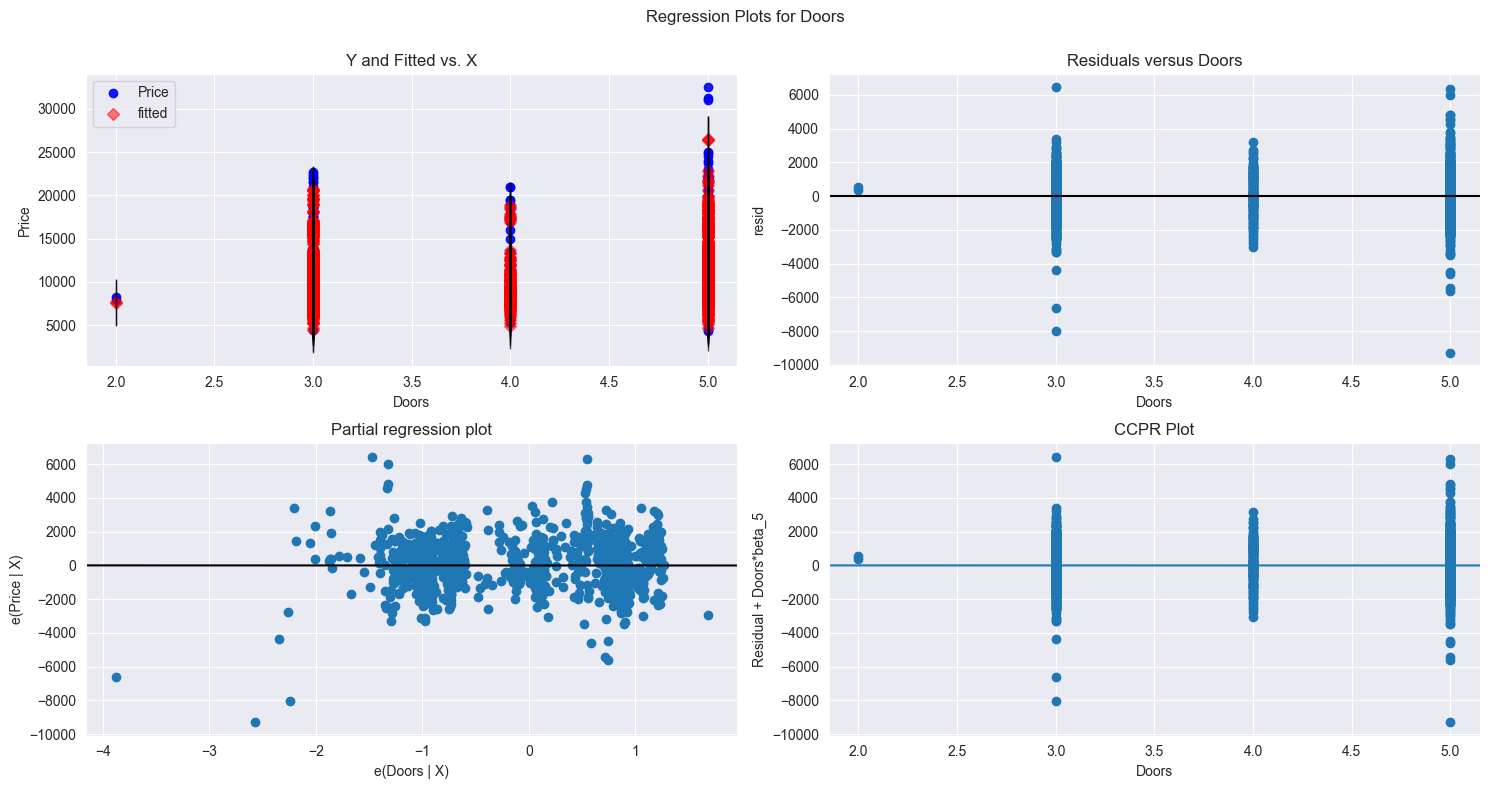

In [31]:
fig=plt.figure(figsize=(15,8))
sa.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

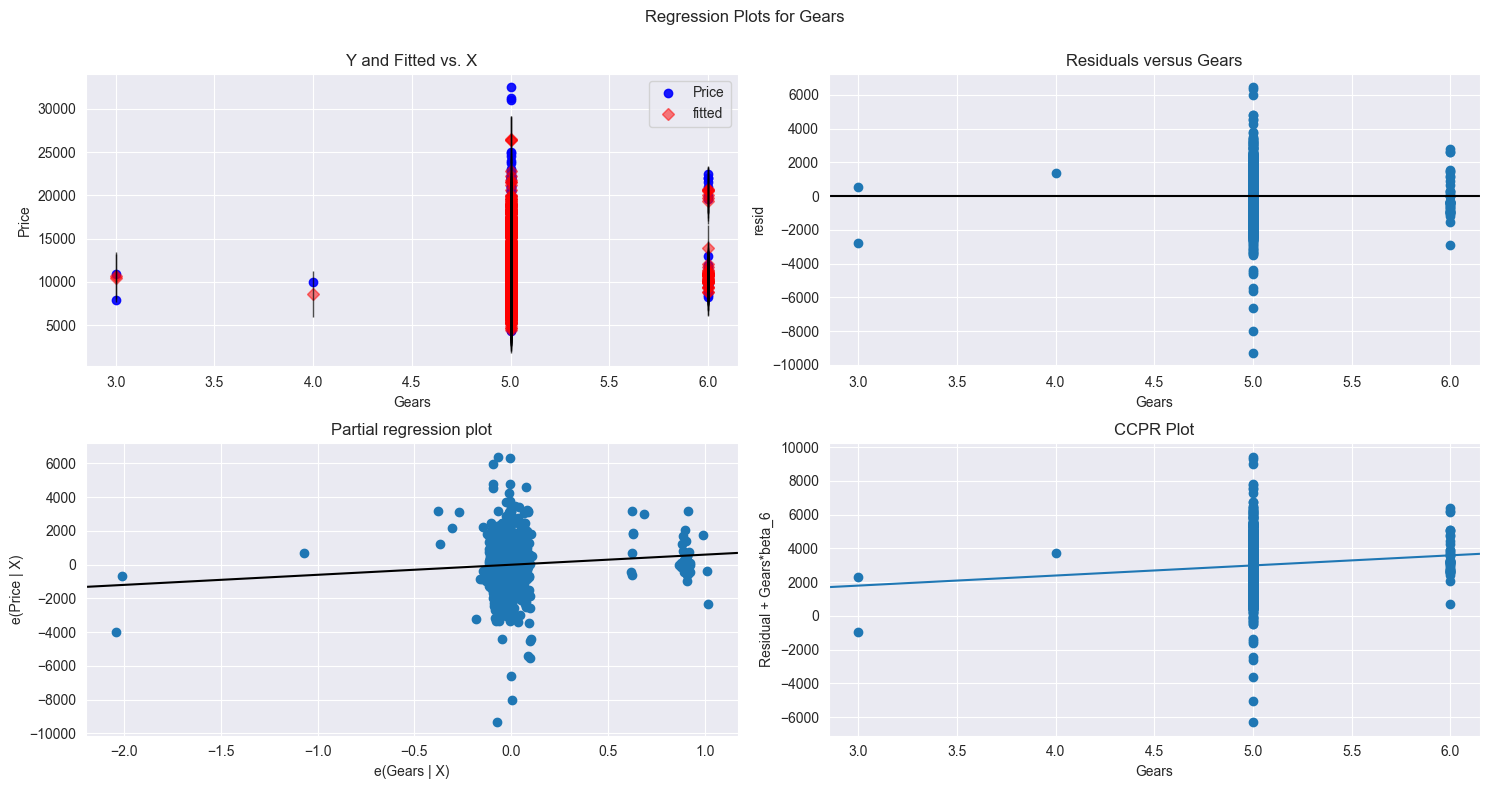

In [32]:
fig=plt.figure(figsize=(15,8))
sa.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

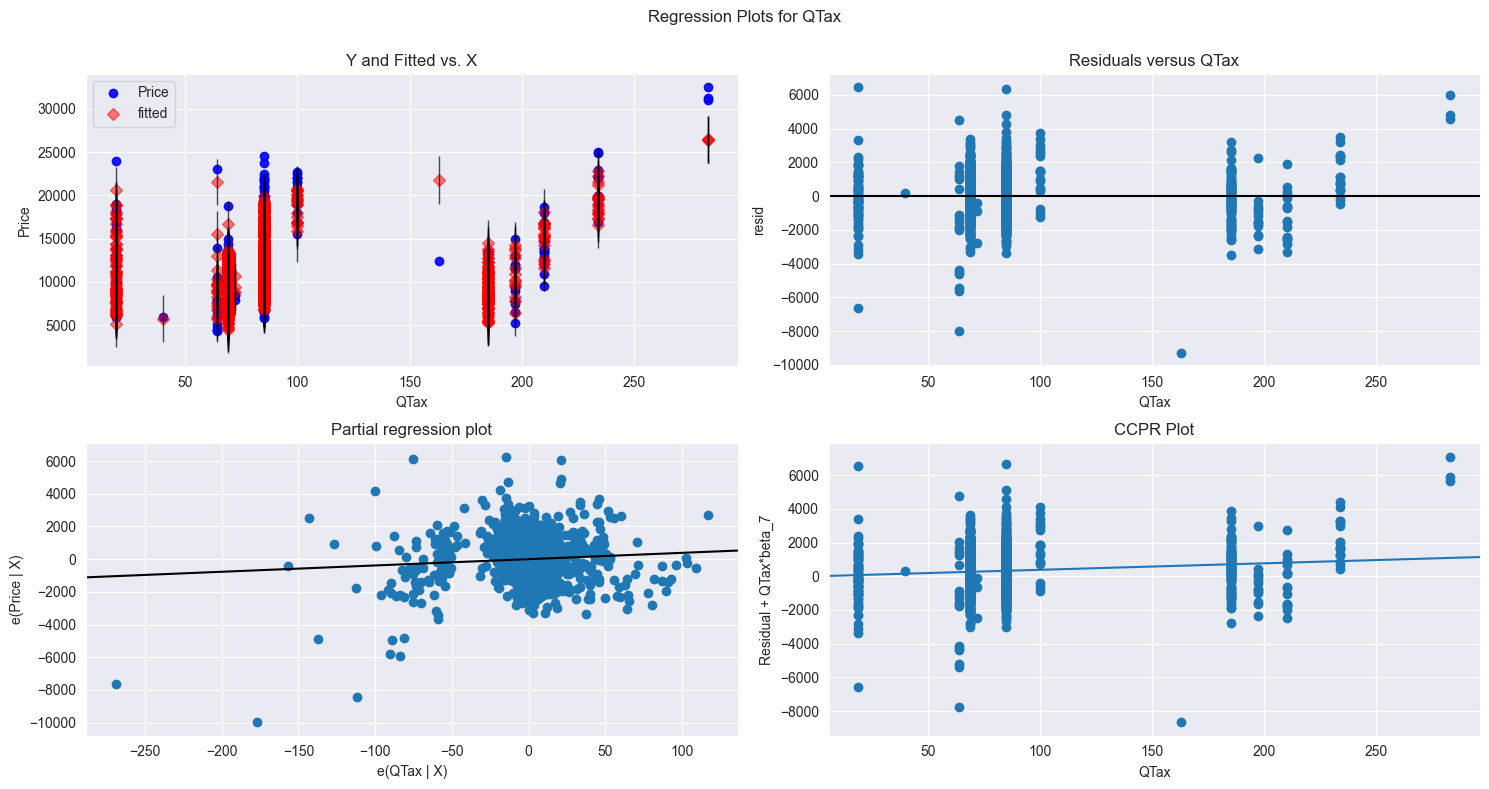

In [33]:
fig=plt.figure(figsize=(15,8))
sa.graphics.plot_regress_exog(model,'QTax',fig=fig)
plt.show()

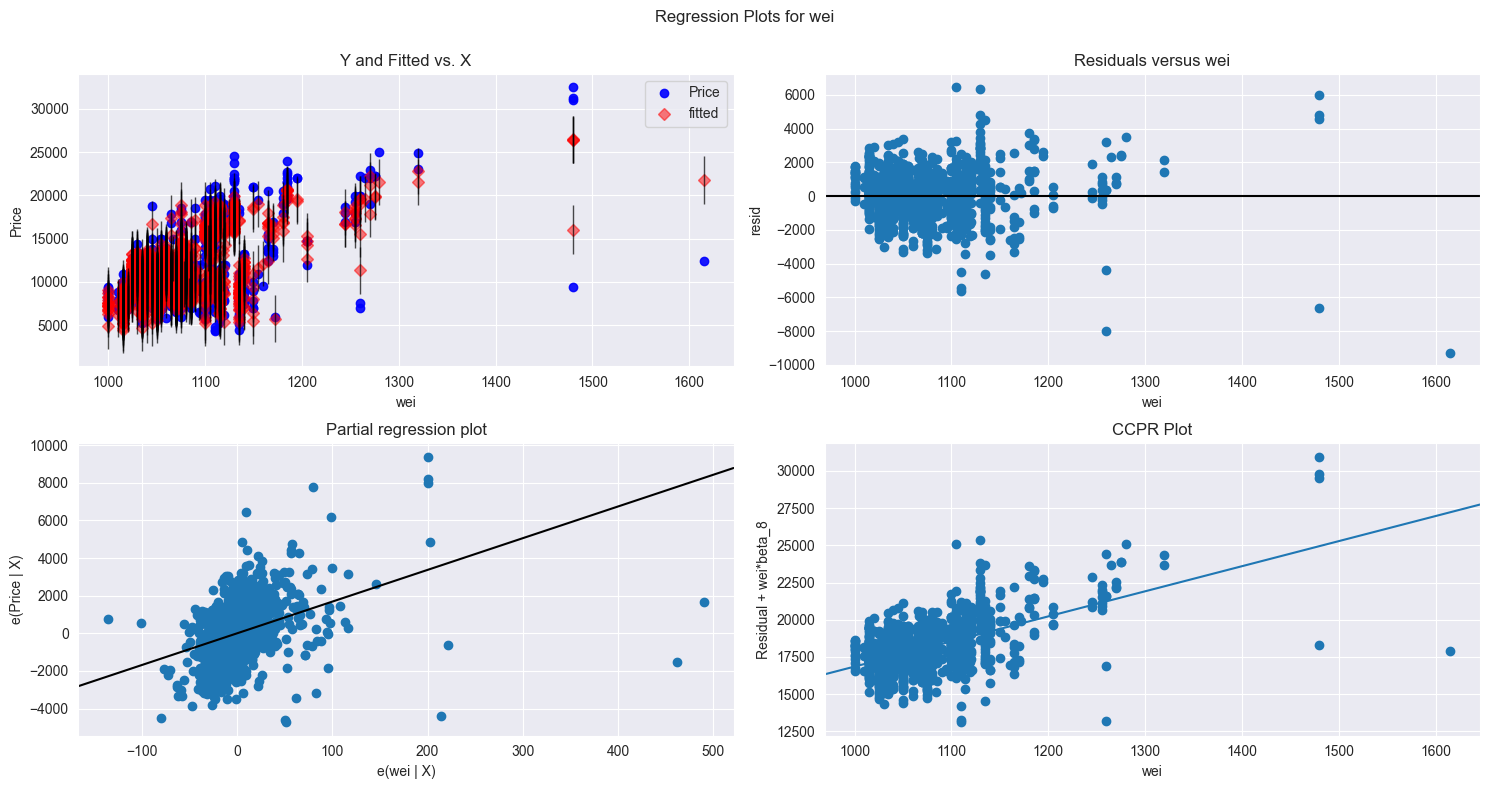

In [34]:
fig=plt.figure(figsize=(15,8))
sa.graphics.plot_regress_exog(model,'wei',fig=fig)
plt.show()

# Model Deletion Diagnostics 

<h2 style="color:red; font-family: Arial;"> 1. Cook's Distance </h2>

In [36]:
inf = model.get_influence()
c,p=inf.cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

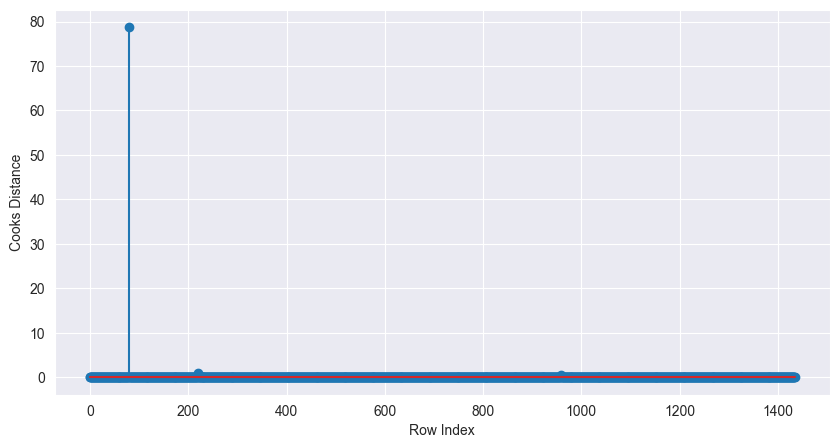

In [38]:
# Plot the influencers using the stem plot
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [39]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 78.7295058225869)

<h2 style="color:red; font-family: Arial;">  2. Leverage value </h2>

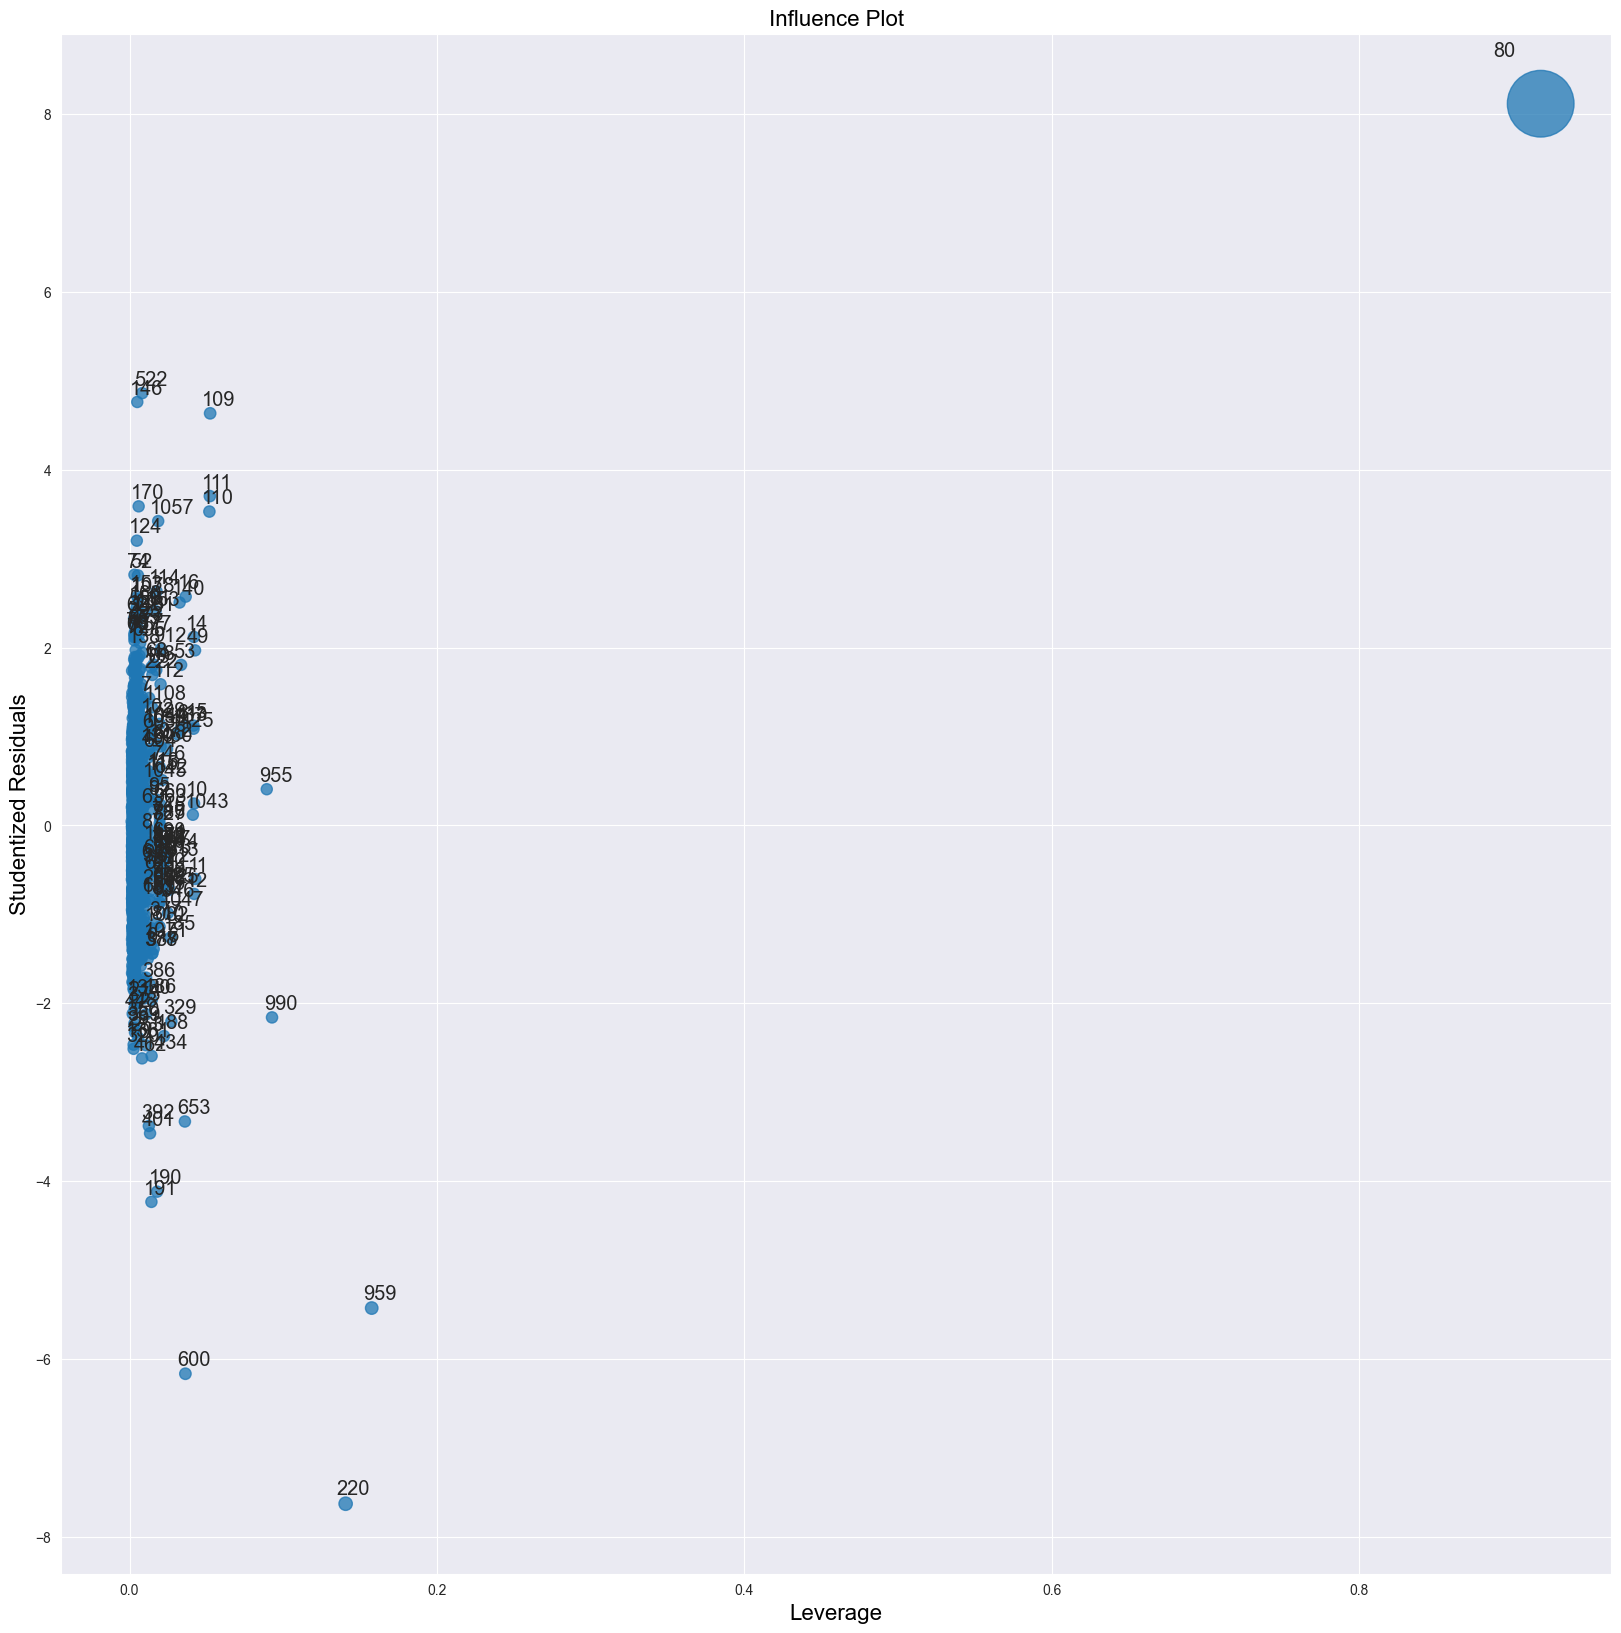

In [44]:
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax=ax)


In [45]:
data[data.index.isin([80])] 

,Price,age,KM,HP,cc,Doors,Gears,QTax,wei
80,18950,25,20019,110,16000,5,5,100,1180


# Improving the Model

In [46]:
# Creating a copy of data so that original dataset is not affected
new=data.copy()
new

,Price,age,KM,HP,cc,Doors,Gears,QTax,wei
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [48]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
new=new.drop(new.index[[80]],axis=0).reset_index(drop=True)
new

,Price,age,KM,HP,cc,Doors,Gears,QTax,wei
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


# Model Deletion Diagnostics and Final Model

In [50]:
while model.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        model=sfa.ols('Price~age+KM+HP+cc+Doors+Gears+QTax+wei',data=new).fit()
        (c,p)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        new=new.drop(new.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        new
    else:
        final_model=sfa.ols('Price~age+KM+HP+cc+Doors+Gears+QTax+wei',data=new).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8765926307402282
Thus model accuracy is improved to 0.8839684606741537
Thus model accuracy is improved to 0.8882395145171204
Thus model accuracy is improved to 0.8902571486612915
Thus model accuracy is improved to 0.8909888960319987
Thus model accuracy is improved to 0.8922595280462808
Thus model accuracy is improved to 0.8933621011392295
Thus model accuracy is improved to 0.8947147371605556
Thus model accuracy is improved to 0.8955233405057648
Thus model accuracy is improved to 0.8930210061069088
Thus model accuracy is improved to 0.893954642514717
Thus model accuracy is improved to 0.8954112430715817
Thus model accuracy is improved to 0.8960182592139027
Thus model accuracy is improved to 0.8968403506948497
Thus model accuracy is improved to 0.8964026771830705
Thus model accuracy is improved to 0.8958538146890626
Thus model accuracy is improved to 0.8953750500147553
Thus model accuracy is improved to 0.8949455651565242
Thus model accuracy is improv

In [51]:
final_model.rsquared 

0.9003762532318559

<span style="color:blue; font-family: Arial;">Model Accuracy is increased to 90.02%</span>

In [53]:
new

,Price,age,KM,HP,cc,Doors,Gears,QTax,wei
0,13750,23,72937,90,2000,3,5,210,1165
1,14950,26,48000,90,2000,3,5,210,1165
2,13750,30,38500,90,2000,3,5,210,1170
3,12950,32,61000,90,2000,3,5,210,1170
4,16900,27,94612,90,2000,3,5,210,1245
...,...,...,...,...,...,...,...,...,...
1325,8450,80,23000,86,1300,3,5,69,1015
1326,7500,69,20544,86,1300,3,5,69,1025
1327,10845,72,19000,86,1300,3,5,69,1015
1328,8500,71,17016,86,1300,3,5,69,1015


# Model Predictions

In [56]:
# consider New data for prediction is
new_data=pd.DataFrame({'age':12,"KM":40000,"HP":80,"cc":1300,"Doors":4,"Gears":5,"QTax":69,"wei":1012},index=[0])
new_data

,age,KM,HP,cc,Doors,Gears,QTax,wei
0,12,40000,80,1300,4,5,69,1012


In [57]:
# Manual Prediction of Price
final_model.predict(new_data)

0    14398.815471
dtype: float64

In [58]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(new)
pred_y

0       15354.362106
1       15415.237858
2       15314.008799
3       14749.534289
4       17544.273936
            ...     
1325     7607.457292
1326     9206.037539
1327     8535.375501
1328     8674.315161
1329     8784.118985
Length: 1330, dtype: float64